In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reviews = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Yelp.csv")
reviews.columns = ['feedback', 'sentiment']

In [3]:
positive = ['great', 'loved', 'prompt','delicious', 'favorite', 'comfortable', 'awesome', 'enjoyed', 'perfect', \
            'outstanding', 'selection', 'incredible', 'interesting', 'beautiful', 'cute', 'inexpensive', 'delight',\
            'delightful', 'fine', 'nice', 'good', 'selection', 'fantastic', 'wonderful', 'fantastic', 'glad']
for pos in positive:
    reviews[str(pos)] = reviews.feedback.str.contains(' ' + str(pos) + ' ')

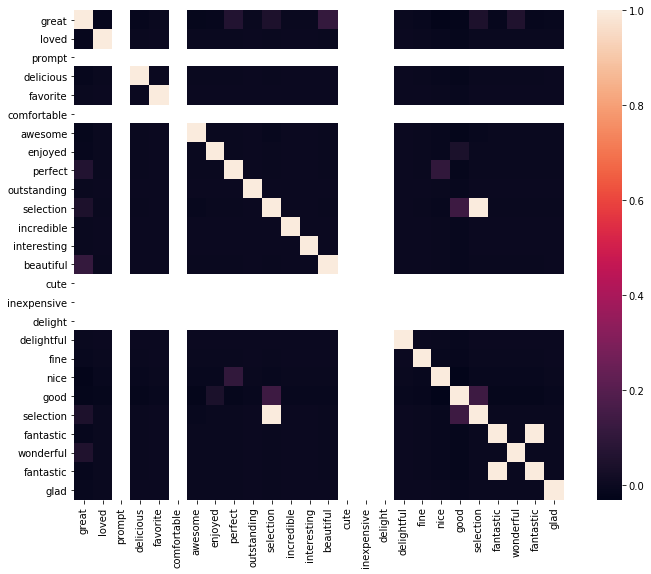

In [5]:
corrmat = reviews[positive].corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)
plt.show()

In [6]:
data = reviews[positive]
target = reviews['sentiment']

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 382


In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[482,  18],
       [364, 136]], dtype=int64)

## Errors in prediction
We caught most of the positive: 482. Only 18 were classified as negative that were positive. The major error was in predicting negative. We predicted positive 364 time when the sentiment was negative.

## Amazon Data

In [68]:
amazon = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Amazon Reviews.csv")
amazon.columns = ['feedback', 'sentiment']

In [69]:
positive = ['great', 'loved', 'prompt','delicious', 'favorite', 'awesome', 'enjoyed', 'perfect', \
            'outstanding', 'selection', 'incredible', 'interesting', 'beautiful',\
            'delightful', 'fine', 'nice', 'good', 'selection', 'fantastic', 'wonderful', 'fantastic', 'glad']
for pos in positive:
    amazon[str(pos)] = amazon.feedback.str.contains(' ' + str(pos) + ' ')

In [70]:
dataAmazon = amazon[positive]
targetAmazon = amazon['sentiment']

In [71]:
bnb = BernoulliNB()

bnb.fit(dataAmazon, targetAmazon)
y_pred = bnb.predict(dataAmazon)

print("Number of mislabeled points out of a total {} points : {}".format(
    dataAmazon.shape[0],
    (targetAmazon != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 426


## Mod 1-Removal of Uncorrelated Data

In [79]:
reviews1 = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Yelp.csv")
reviews1.columns = ['feedback', 'sentiment']

In [80]:
positive = ['great', 'loved', 'delicious', 'favorite', 'awesome', 'enjoyed', 'perfect', 'outstanding', 'selection', \
             'incredible', 'interesting', 'beautiful', 'delightful', 'fine', 'nice', 'good', 'wonderful', 'fantastic', \
            'glad']
for pos in positive:
    reviews1[str(pos)] = reviews1.feedback.str.contains(' ' + str(pos) + ' ')

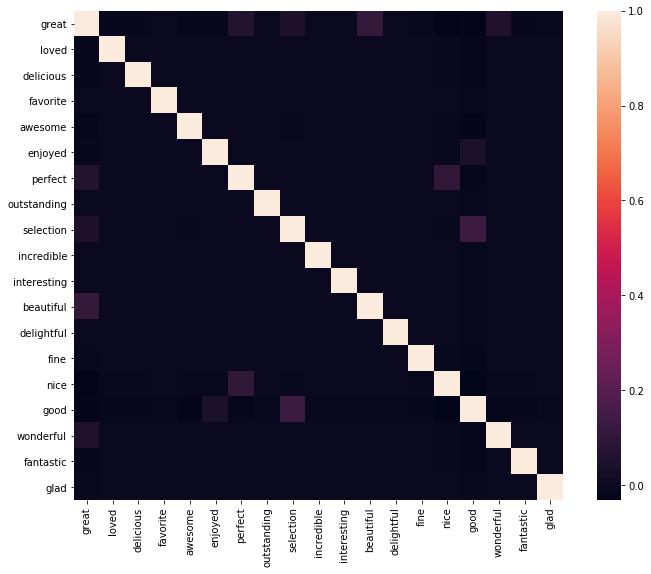

In [81]:
corrmat = reviews1[positive].corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)
plt.show()

In [16]:
data1 = reviews1[positive]
target1 = reviews1['sentiment']

In [17]:
bnb = BernoulliNB()

bnb.fit(data1, target1)
y_pred = bnb.predict(data1)

print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 382


In [18]:
confusion_matrix(target1, y_pred)

array([[482,  18],
       [364, 136]], dtype=int64)

## Errors in prediction
We get the same result as above

## Mod 2-Negative Words with Reversed Sentiment

In [75]:
reviews2 = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Yelp.csv")
reviews2.columns = ['feedback', 'sentiment']

In [76]:
reviews2['sentimentReverse'] = np.where(reviews2['sentiment'] == 0, 1, 0)

In [77]:
negative = ['nasty', 'would not', 'disgusted', 'slow', 'worst', 'poor', 'sucker', 'sucked',  'grossed', 'bad', 'horrible',\
            'excuse', 'waste', 'wasting', 'bland', 'rude', 'wasn\'t', 'disappointing', 'wouldn\'t', 'terrible', 'mediocre',\
            'do not', 'wait', 'waited', 'did not', 'not good' ]
for neg in negative:
    reviews2[str(neg)] = reviews2.feedback.str.contains(' ' + str(neg) + ' ')

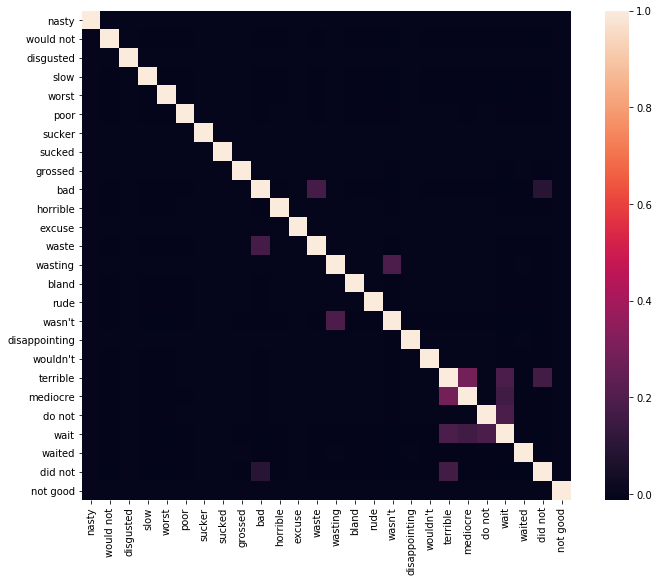

In [78]:
corrmat = reviews2[negative].corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)
plt.show()

In [23]:
data2 = reviews2[negative]
target2 = reviews2['sentimentReverse']

In [24]:
bnb = BernoulliNB()

bnb.fit(data2, target2)
y_pred = bnb.predict(data2)

print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 405


In [25]:
confusion_matrix(target2, y_pred)

array([[495,   5],
       [400, 100]], dtype=int64)

## Errors in prediction
We mangaed to correctly identify 495 negative sentiments, with only 5 identified as positive. The major error in this irertation is that 400 data points were marked as negative that were positive and only 100 were marked correctly as positive.

## Mod 3-Neg Reversed

In [71]:
reviews3 = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Yelp.csv")
reviews3.columns = ['feedback', 'sentiment']

In [72]:
negative = ['nasty', 'would not', 'disgusted', 'slow', 'worst', 'poor', 'sucker', 'sucked',  'grossed', 'bad', 'horrible',\
            'excuse', 'waste', 'wasting', 'bland', 'rude', 'wasn\'t', 'disappointing', 'wouldn\'t', 'terrible', 'mediocre',\
            'do not', 'wait', 'waited', 'did not', 'not good' ]
for neg in negative:
    reviews3[str(neg)] = ~(reviews3.feedback.str.contains(' ' + str(neg) + ' '))

In [73]:
data3 = reviews3[negative]
target3 = reviews3['sentiment']

In [74]:
bnb = BernoulliNB()

bnb.fit(data3, target3)
y_pred = bnb.predict(data3)

print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 405


In [31]:
confusion_matrix(target3, y_pred)

array([[400, 100],
       [495,   5]], dtype=int64)

## Errors in prediction
This produces the same result as aboe with positive and negative reversed.

## Mod 4-Pos and Neg Combine

In [67]:
reviews4 = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Yelp.csv")
reviews4.columns = ['feedback', 'sentiment']

In [68]:
positive = ['great', 'loved', 'delicious', 'favorite', 'awesome', 'enjoyed', 'perfect', 'outstanding', 'selection', \
             'incredible', 'interesting', 'beautiful', 'delightful', 'fine', 'nice', 'good', 'wonderful', 'fantastic',\
            'glad']
for pos in positive:
    reviews4[str(pos)] = reviews4.feedback.str.contains(' ' + str(pos) + ' ')
    
negative = ['nasty', 'would not', 'disgusted', 'slow', 'worst', 'poor', 'sucker', 'sucked',  'grossed', 'bad', 'horrible',\
            'excuse', 'wasting', 'bland', 'rude', 'wasn\'t', 'disappointing', 'wouldn\'t', 'terrible', 'waste', 'mediocre',\
            'do not', 'wait', 'waited', 'did not', 'not good' ]
for neg in negative:
    reviews4[str(neg)] = ~(reviews4.feedback.str.contains(' ' + str(neg) + ' '))

In [69]:
data4 = reviews4[positive].join(reviews4[negative])
target4 = (reviews4['sentiment'])

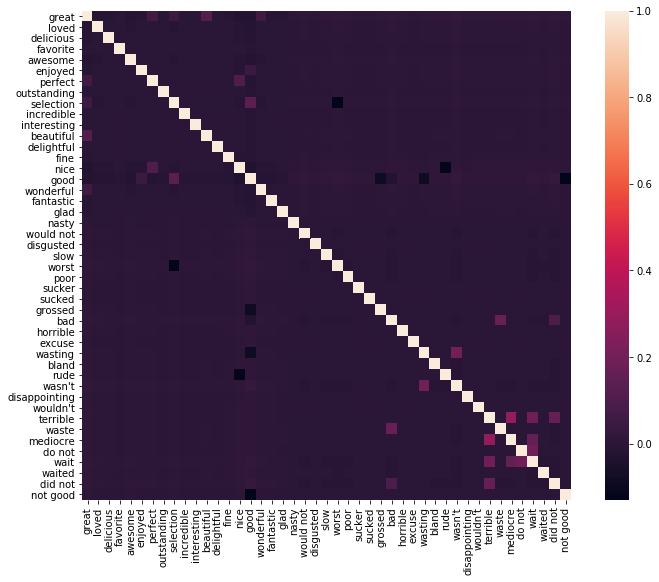

In [70]:
corrmat = data4.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)
plt.show()

In [37]:
bnb = BernoulliNB()

bnb.fit(data4, target4)
y_pred = bnb.predict(data4)

print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 377


In [39]:
confusion_matrix(target4, y_pred)

array([[487,  13],
       [364, 136]], dtype=int64)

## Errors in prediction
Despite this being the most accurate model with 377 mislabled data points, 364 data points were labeled positive that were negative.

## Mod 5- Positive including overlapping words

In [83]:
reviews5 = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Yelp.csv")
reviews5.columns = ['feedback', 'sentiment']

In [84]:
positive = ['great', 'loved', 'delicious', 'favorite', 'awesome', 'enjoyed', 'perfect', 'outstanding', 'selection', \
             'incredible', 'interesting', 'beautiful', 'delightful', 'fine', 'nice', 'good', 'fantastic',\
             'wonderful', 'fantastic', 'glad', 'very', 'friendly', 'best', 'happy']
for pos in positive:
    reviews5[str(pos)] = reviews5.feedback.str.contains(' ' + str(pos) + ' ')

In [85]:
data5 = reviews5[positive]
target5 = (reviews5['sentiment'])

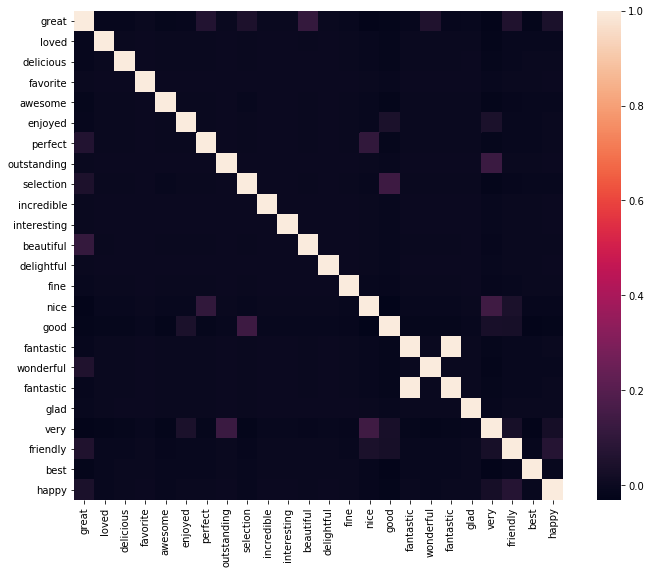

In [86]:
corrmat = data5.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)
plt.show()

In [87]:
bnb = BernoulliNB()

bnb.fit(data5, target5)
y_pred = bnb.predict(data5)

print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 350


In [88]:
confusion_matrix(target5, y_pred)

array([[462,  38],
       [312, 188]], dtype=int64)

## Errors in prediction
This model is the most accurate at only 350 mislabled data points. The error is still in incorrectly predicting negative words as positive.